In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from scipy import stats
from statsmodels import robust

--Calculate the mean, trimmed mean and median for the population--

In [6]:
state = pd.read_csv(r"E:\Data Science Post Class\Kaggle\Descriptive Statistics\Statistics for Data Scientists-O'Reilly\state.csv")

In [7]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [8]:
state.shape

(50, 4)

In [9]:
#mean
state['Population'].mean()

6162876.3

In [10]:
state['Population'].median()

4436369.5

In [14]:
# trimmed mean
stats.trim_mean(state['Population'],0.1)

4783697.125

**Calculate the average homicide rate for the country. Necessary to calculate the weighted average or median**

In [16]:
# weighted average
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [19]:
# weighted median
state.sort_values('Murder.Rate',inplace=True)
cumsum = state.Population.cumsum()

In [20]:
cumsum

28      1316470
22      6620395
18      7948756
44      8574497
10      9934798
14     12981153
36     16812227
20     23359856
11     24927438
43     27691323
40     28505503
6      32079600
38     33132167
46     39856707
49     40420333
5      45449529
26     47275870
48     52962856
33     53635447
15     56488565
31     75866667
25     76856082
16     81195449
29     89987343
34    101523847
47    103376841
45    111377865
42    136523426
4     173777382
35    177528733
2     183920750
30    185979929
37    198682308
13    205166110
32    214701593
12    227532225
21    237415865
1     238126096
3     241042014
41    247388119
0     252167855
9     261855508
8     280656818
7     281554752
27    284255303
19    290028855
39    294654219
24    300643146
23    303610443
17    308143815
Name: Population, dtype: int64

In [23]:
cutoff = state.Population.sum()/2.0

In [24]:
cutoff

154071907.5

In [27]:
median_weight = state['Murder.Rate'][cumsum>=cutoff].iloc[0]

In [28]:
median_weight

4.4

In [29]:
#Standard Deviation
state['Population'].std()

6848235.347401142

In [30]:
# Interquatile range (IQR)
q1 = state['Population'].quantile(0.25)
q3=state['Population'].quantile(0.75)

In [31]:
iqr = q3-q1

In [32]:
iqr

4847308.0

In [33]:
#mad
robust.mad(state['Population'])

3849876.1459979336

**Calculate the homicide rate percentiles and view the population data distribution by boxplot**

In [35]:
#homicide rate percentiles
q_5 = round(state['Murder.Rate'].quantile(0.05),2)
q_25= round(state['Murder.Rate'].quantile(0.25),2)
q_50 = round(state['Murder.Rate'].quantile(0.50),2)
q_75= round(state['Murder.Rate'].quantile(0.75),2)
q_95= round(state['Murder.Rate'].quantile(0.95),2)
print(f'5%{q_5} - 25% {q_25} - 50% {q_50} - 75% {q_75} - 95% {q_95}')

5%1.6 - 25% 2.42 - 50% 4.0 - 75% 5.55 - 95% 6.51


**The median is 4 homicides per 100 thousand people, but there is variability: the 5º percentile is only 1.6, and the 95º percentile is 6.51.**

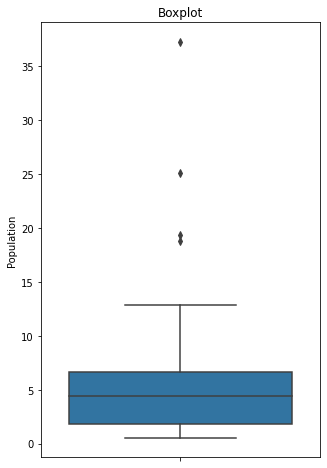

In [36]:
# population data distribution by boxplot
plt.figure(figsize=(5,8))
sns.boxplot(y=state['Population']/1000000)
plt.title("Boxplot")
plt.show()

In [38]:
# show outliers
state.sort_values(by='Population',ascending=False).head(4)

,State,Population,Murder.Rate,Abbreviation
4,California,37253956,4.4,CA
42,Texas,25145561,4.4,TX
31,New York,19378102,3.1,NY
8,Florida,18801310,5.8,FL


**Display population frequencies by state in Histograms**

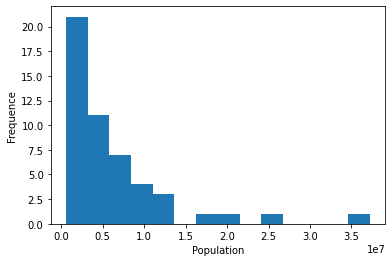

In [40]:
#histogram
plt.hist(state['Population'],bins='auto')
plt.xlabel('Population')
plt.ylabel('Frequence')
plt.show()

E:\Anaconda1\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


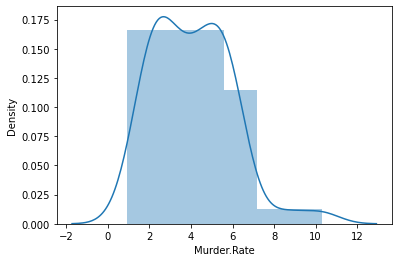

In [41]:
sns.distplot(state['Murder.Rate'])
plt.ylabel('Density')
plt.show()

In [44]:
sp500_sym = pd.read_csv(r"E:\Data Science Post Class\Kaggle\Descriptive Statistics\Statistics for Data Scientists-O'Reilly\sp500_sectors.csv")

In [45]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [46]:
sp500_px  = pd.read_csv(r"E:\Data Science Post Class\Kaggle\Descriptive Statistics\Statistics for Data Scientists-O'Reilly\Compressed\sp500_data.csv")

In [47]:
sp500_px .head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [48]:
sp500_px = sp500_px.rename(columns={'Unnamed: 0': 'DATA'})

In [49]:
sp500_px.head()

,DATA,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [50]:
etfs = sp500_px.loc[sp500_px['DATA']>"2012-07-01",sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]


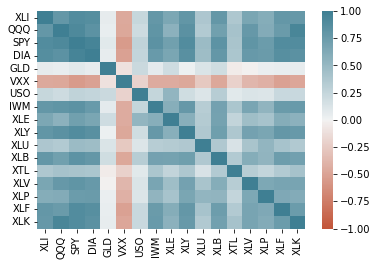

In [51]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

In [52]:
#another way to plot using pandas
etfs_2 = etfs.corr()
etfs_2.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Abdul Wajeed\AppData\Local\Temp\ipykernel_14496\2617941333.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  etfs_2.style.background_gradient(cmap='coolwarm').set_precision(2)


,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.00,0.79,0.89,0.87,0.06,-0.47,0.24,0.78,0.65,0.80,0.38,0.78,0.37,0.66,0.60,0.79,0.78
QQQ,0.79,1.00,0.91,0.83,0.04,-0.47,0.20,0.81,0.56,0.84,0.35,0.71,0.42,0.78,0.61,0.75,0.95
SPY,0.89,0.91,1.00,0.95,0.08,-0.55,0.27,0.83,0.71,0.89,0.48,0.83,0.41,0.81,0.74,0.88,0.89
DIA,0.87,0.83,0.95,1.00,0.05,-0.51,0.26,0.76,0.66,0.85,0.46,0.79,0.38,0.77,0.75,0.86,0.84
GLD,0.06,0.04,0.08,0.05,1.00,-0.11,0.22,0.07,0.19,0.02,0.12,0.18,-0.04,-0.01,0.03,0.04,0.05
VXX,-0.47,-0.47,-0.55,-0.51,-0.11,1.00,-0.20,-0.45,-0.45,-0.47,-0.26,-0.47,-0.21,-0.38,-0.42,-0.51,-0.48
USO,0.24,0.20,0.27,0.26,0.22,-0.20,1.00,0.25,0.53,0.18,0.11,0.32,0.08,0.12,0.12,0.22,0.23
IWM,0.78,0.81,0.83,0.76,0.07,-0.45,0.25,1.00,0.59,0.78,0.33,0.70,0.39,0.66,0.54,0.76,0.76
XLE,0.65,0.56,0.71,0.66,0.19,-0.45,0.53,0.59,1.00,0.58,0.34,0.69,0.26,0.45,0.41,0.60,0.56
XLY,0.80,0.84,0.89,0.85,0.02,-0.47,0.18,0.78,0.58,1.00,0.37,0.72,0.37,0.70,0.66,0.78,0.77


**Plot the scatterplot to visualize the relationship of two variables**

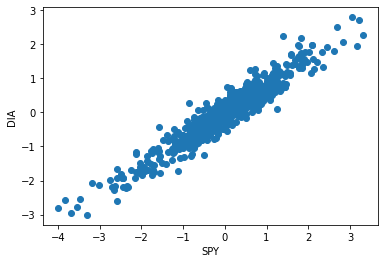

In [53]:
# positively correlated
plt.xlabel('SPY')
plt.ylabel('DIA')
plt.scatter(etfs['SPY'], etfs['DIA'])
plt.show()

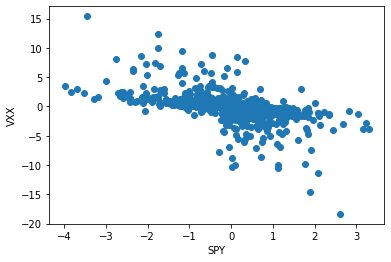

In [54]:
# negatively correlated
plt.xlabel('SPY')
plt.ylabel('VXX')
plt.scatter(etfs['SPY'], etfs['VXX'])
plt.show()

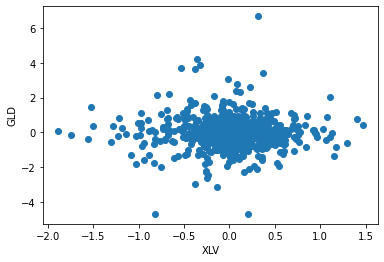

In [55]:
# no correlation
plt.xlabel('XLV')
plt.ylabel('GLD')
plt.scatter(etfs['XLV'], etfs['GLD'])
plt.show()

In [58]:
# loading new dataset for this analysis
kc_tax = pd.read_csv(r"E:\Data Science Post Class\Kaggle\Descriptive Statistics\Statistics for Data Scientists-O'Reilly\Compressed/kc_tax.csv")
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [59]:
# Removing very expensive and very small or large residences
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) & 
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

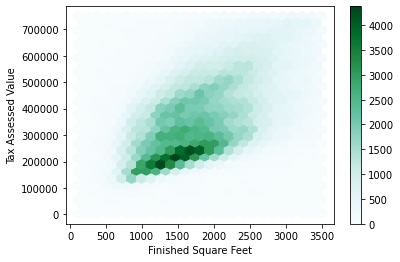

<Figure size 1584x720 with 0 Axes>

In [60]:
kc_tax0.plot(kind='hexbin', x='SqFtTotLiving', y='TaxAssessedValue', sharex=False, gridsize=25)
plt.xlabel('Finished Square Feet')
plt.ylabel('Tax Assessed Value')
plt.figure(figsize=(22,10))
plt.show()

In [61]:
kc_tax_zip1 = kc_tax0.loc[(kc_tax0.ZipCode == 98188), :]
kc_tax_zip2 = kc_tax0.loc[(kc_tax0.ZipCode == 98105), :]
kc_tax_zip3 = kc_tax0.loc[(kc_tax0.ZipCode == 98108), :]
kc_tax_zip4 = kc_tax0.loc[(kc_tax0.ZipCode == 98126), :]

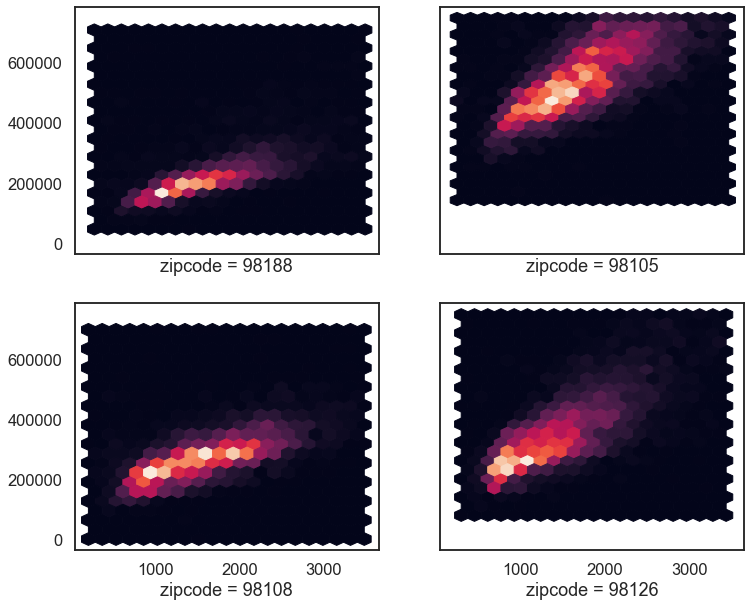

In [62]:
sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 10))
ax1.hexbin(kc_tax_zip1.SqFtTotLiving, kc_tax_zip1.TaxAssessedValue, gridsize=20)
ax1.set_xlabel('zipcode = 98188')

ax2.hexbin(kc_tax_zip2.SqFtTotLiving, kc_tax_zip2.TaxAssessedValue, gridsize=20)
ax2.set_xlabel('zipcode = 98105')

ax3.hexbin(kc_tax_zip3.SqFtTotLiving, kc_tax_zip3.TaxAssessedValue, gridsize=20)
ax3.set_xlabel('zipcode = 98108')

ax4.hexbin(kc_tax_zip4.SqFtTotLiving, kc_tax_zip4.TaxAssessedValue, gridsize=20)
ax4.set_xlabel('zipcode = 98126')

plt.show()

**Contingency tables for two categorical variables**

In [63]:
lc_loans = pd.read_csv(r"E:\Data Science Post Class\Kaggle\Descriptive Statistics\Statistics for Data Scientists-O'Reilly\Compressed\lc_loans.csv")

In [64]:
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [65]:
x_tab = pd.crosstab(lc_loans.grade, lc_loans.status)

In [66]:
x_tab['Total'] = pd.crosstab(lc_loans.grade, lc_loans.status).apply(lambda r: r.sum(), axis=1)
x_tab

status,Charged Off,Current,Fully Paid,Late,Total
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [69]:
airline_stats= pd.read_csv(r"E:\Data Science Post Class\Kaggle\Descriptive Statistics\Statistics for Data Scientists-O'Reilly\Compressed/airline_stats.csv")
airline_stats.sample(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
6943,4.709677,1.741935,0.000000,Alaska
28355,6.567839,5.180905,3.241206,American
11174,6.333333,7.555556,0.805556,United
19462,3.225806,10.177419,4.338710,Alaska
2622,9.995951,3.676113,1.995951,American


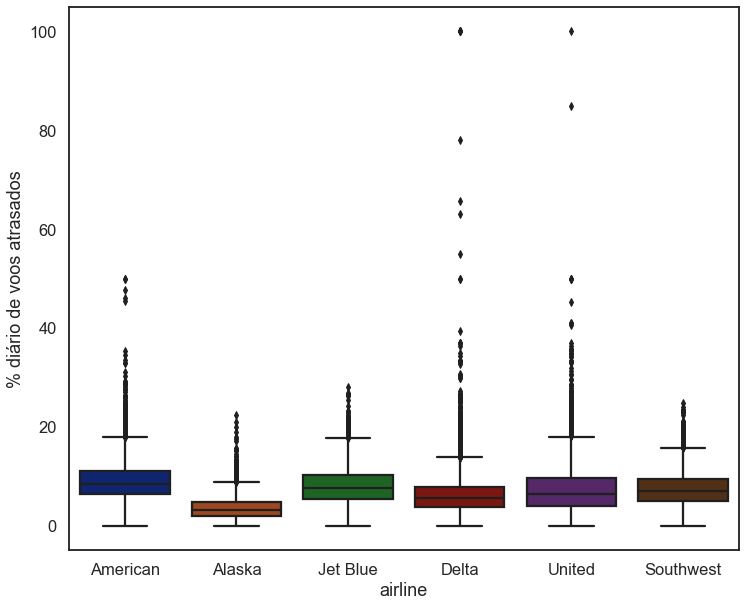

In [70]:
plt.figure(figsize=(12,10))
sns.boxplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay)
plt.ylabel("% diário de voos atrasados")
plt.show()

**End**